In [2]:
import sys
!{sys.executable} -m pip install pandasql


  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'pandasql' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pandasql'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=bc10d641619243c4f946166cb6a6b8135824f351895b815d3662d2450144054e
  Stored in directory: /Users/fidatcd/Library/Caches/pip/wheels/b4/d0/8c/a6b366870bf041849cd96e03b71641e082f8d6456269b603b7
Successfully built pandasql


In [3]:
import numpy as np 
import pandas as pd
from pandasql import sqldf

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Set theme and style
sns.set_theme(style="white")
sns.despine()
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

# Custom Matplotlib params
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


<Figure size 640x480 with 0 Axes>

In [4]:
FIG_DIR = "./figures_yash"

In [5]:
df_a = pd.read_csv("articles.csv")
df_t = pd.read_csv("transactions_train.csv")
df_c = pd.read_csv("customers.csv")

In [6]:
df_a.head(1)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [7]:
df_a.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [8]:
df_a = sqldf("""SELECT article_id, prod_name, product_type_name, product_group_name, colour_group_name, index_name
            FROM df_a
            """)

In [9]:
df_a.head()

,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Black,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,White,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Off White,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Black,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,White,Lingeries/Tights


In [10]:
df_t.head(1)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2


In [11]:
df_t.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [12]:
print(f"The dataframe Transactions has {len(df_t)} rows")

The dataframe Transactions has 31788324 rows


In [13]:
df_t = df_t[["customer_id", "article_id", "price"]]

In [14]:
df_sold_qty = df_t["article_id"].value_counts()
df_sold_qty

article_id
706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: count, Length: 104547, dtype: int64

In [15]:
df_sold_qty=df_sold_qty.reset_index()
df_sold_qty.rename(columns = {"article_id":"sold_qty","index":"article_id"}, inplace=True)
df_sold_qty.head()

,sold_qty,count
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [16]:
df_sold_qty["sold_qty"].describe()

count    1.045470e+05
mean     6.968200e+08
std      1.277177e+08
min      1.087750e+08
25%      6.161290e+08
50%      7.010500e+08
75%      7.945750e+08
max      9.562170e+08
Name: sold_qty, dtype: float64

In [17]:
df_sold_qty["sold_qty"].quantile([0.90,0.95,0.99,0.999])

0.900    8.618510e+08
0.950    8.864890e+08
0.990    9.207660e+08
0.999    9.400360e+08
Name: sold_qty, dtype: float64

In [18]:
top_100_sold = df_sold_qty.iloc[:100]
top_100_sold.head()

,sold_qty,count
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [19]:
print(top_100_sold.columns)
print(df_a.columns)


Index(['sold_qty', 'count'], dtype='object')
Index(['article_id', 'prod_name', 'product_type_name', 'product_group_name',
       'colour_group_name', 'index_name'],
      dtype='object')


In [20]:
top_100_sold = top_100_sold.rename(columns={'article_id':'article_id'})
df_a = df_a.rename(columns={'article_id':'article_id'})


In [21]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [22]:
print(top_100_sold.columns)
print(df_a.columns)


Index(['sold_qty', 'count'], dtype='object')
Index(['article_id', 'prod_name', 'product_type_name', 'product_group_name',
       'colour_group_name', 'index_name'],
      dtype='object')


In [23]:
query = """
SELECT t.*, a.*
FROM top_100_sold AS t
INNER JOIN df_a AS a
  ON t.sold_qty = a.article_id
"""
top_100_details = pysqldf(query)


In [24]:
top_100_details.head()

,sold_qty,count,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,50287,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,35043,706016002,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,372860001,31718,372860001,7p Basic Shaftless,Socks,Socks & Tights,Black,Lingeries/Tights
3,610776002,30199,610776002,Tilly (1),T-shirt,Garment Upper body,Black,Ladieswear
4,759871002,26329,759871002,Tilda tank,Vest top,Garment Upper body,Black,Divided


/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3077383936.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3077383936.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3077383936.py:21: UserWarning: The palette list has more values (30) than needed (24), which may not be intended.
  g = sns.barplot(


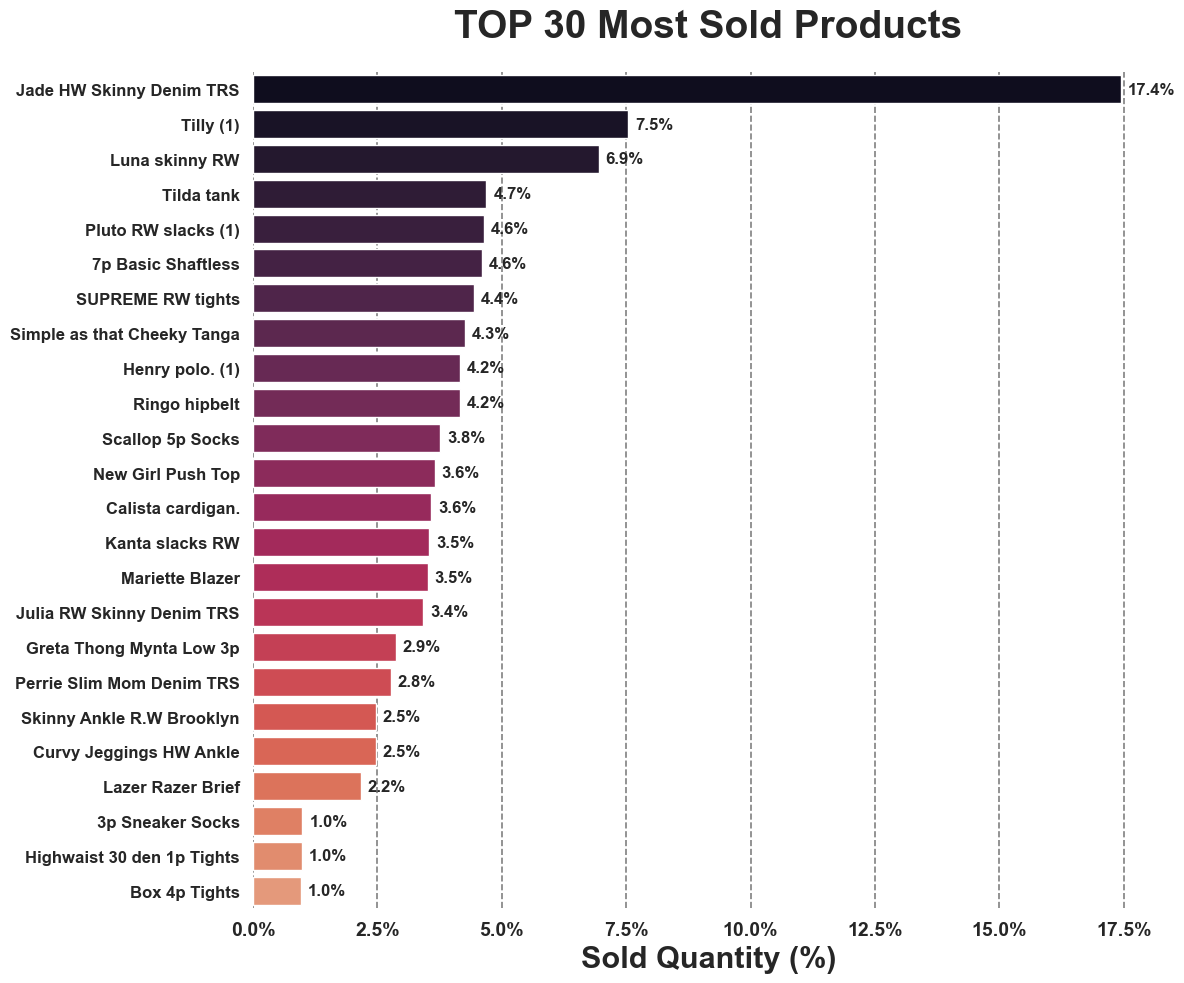

In [31]:
import matplotlib.ticker as mtick

# Prepare data for top 30 products
no = 30
top30_data = (
    top_100_details.iloc[:no]
    .groupby("prod_name")["sold_qty"]
    .sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename('sold_qty(%)')
    .reset_index()
    .sort_values(by="sold_qty(%)", ascending=False)  # descending order
)

# Plot
plt.figure(figsize=(12,10))
plt.title("TOP 30 Most Sold Products", fontsize=28, fontweight="bold", pad=25)

# Create horizontal barplot with custom palette
palette = sns.color_palette("rocket", n_colors=no)
g = sns.barplot(
    x="sold_qty(%)",
    y="prod_name",
    data=top30_data,
    palette=palette,
    ci=False,
    order=top30_data["prod_name"]  # ensure descending order on y-axis
)

# Add value labels on bars
for container in g.containers:
    g.bar_label(container, fmt="%.1f%%", padding=5, fontsize=12, weight="bold")

# Style adjustments
plt.xlabel("Sold Quantity (%)", fontsize=22, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x", color='gray', linestyle='--', linewidth=1.2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())  # show x-axis as %

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph1.png", dpi=150, bbox_inches="tight")

plt.show()


/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2493551132.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2493551132.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2493551132.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2493551132.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjd

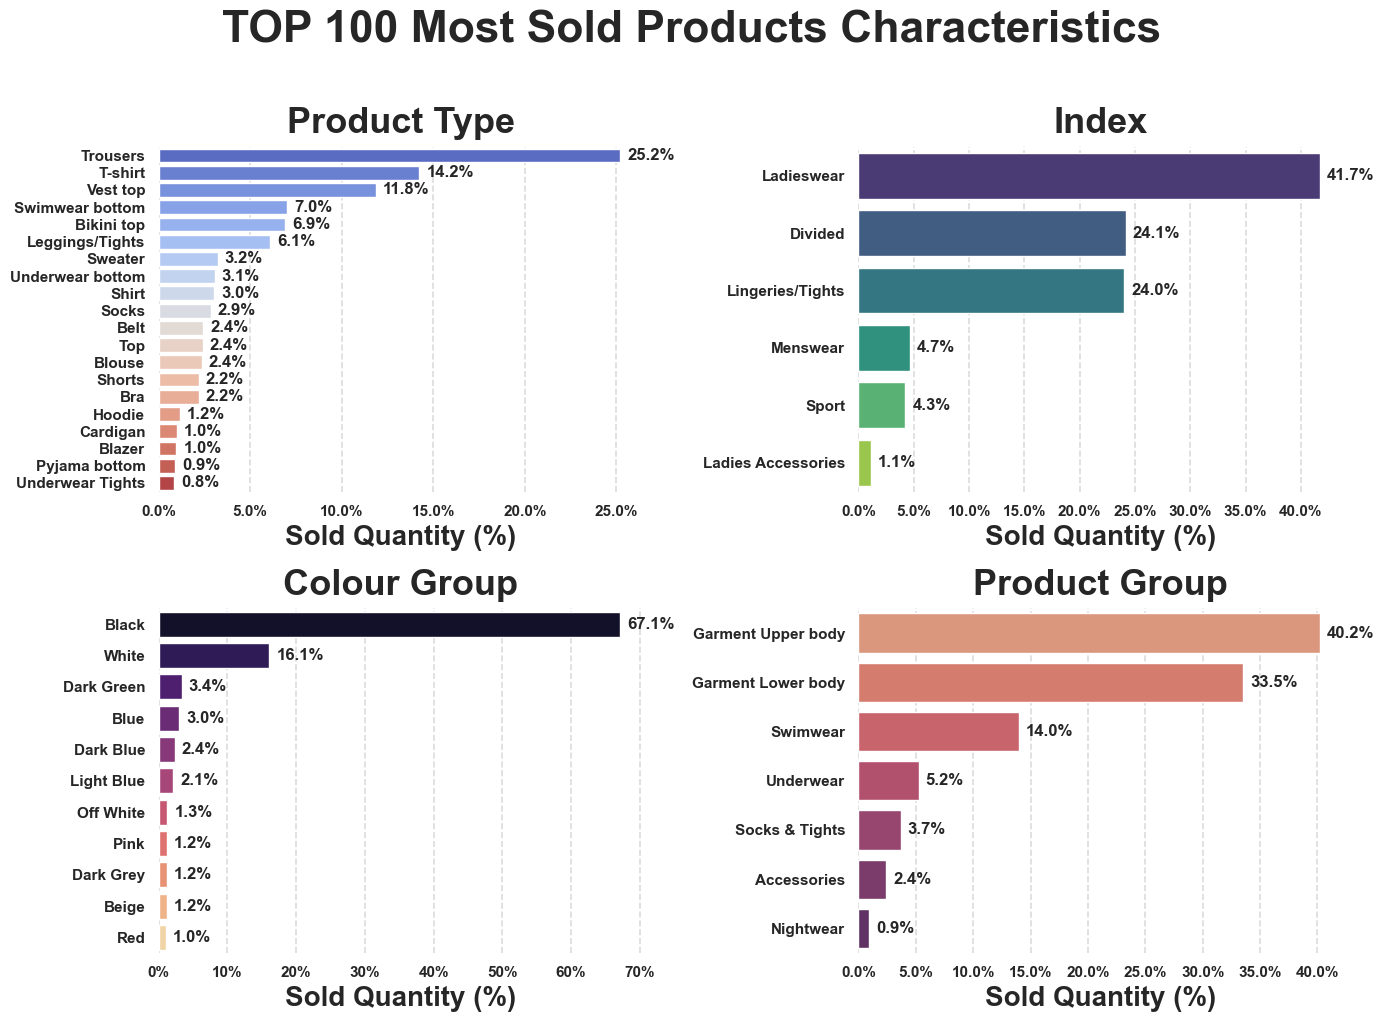

In [32]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle("TOP 100 Most Sold Products Characteristics", fontweight="bold", fontsize=32, y=1.02)

no = 100

# Function to prepare data
def prepare_data(df, column):
    return (
        df.iloc[:no]
        .groupby(column)["sold_qty"]
        .sum()
        .transform(lambda x: (x / x.sum() * 100))
        .rename('sold_qty(%)')
        .reset_index()
        .sort_values(by="sold_qty(%)", ascending=False)  # descending order
    )

# Product Type
data = prepare_data(top_100_details, "product_type_name")
palette = sns.color_palette("coolwarm", n_colors=len(data))
g = sns.barplot(
    y="product_type_name", x="sold_qty(%)", data=data,
    ax=ax[0, 0], palette=palette, ci=False
)
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, weight="bold")
ax[0,0].set_xlabel("Sold Quantity (%)", fontsize=20, fontweight="bold")
ax[0,0].set_ylabel("")
ax[0,0].set_title("Product Type", fontsize=26, fontweight="bold")
ax[0,0].grid(axis="x", linestyle='--', linewidth=1.2, alpha=0.7)
ax[0,0].xaxis.set_major_formatter(mtick.PercentFormatter())

# Index
data = prepare_data(top_100_details, "index_name")
palette = sns.color_palette("viridis", n_colors=len(data))
g = sns.barplot(
    y="index_name", x="sold_qty(%)", data=data,
    ax=ax[0, 1], palette=palette, ci=False
)
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, weight="bold")
ax[0,1].set_xlabel("Sold Quantity (%)", fontsize=20, fontweight="bold")
ax[0,1].set_ylabel("")
ax[0,1].set_title("Index", fontsize=26, fontweight="bold")
ax[0,1].grid(axis="x", linestyle='--', linewidth=1.2, alpha=0.7)
ax[0,1].xaxis.set_major_formatter(mtick.PercentFormatter())

# Colour Group
data = prepare_data(top_100_details, "colour_group_name")
palette = sns.color_palette("magma", n_colors=len(data))
g = sns.barplot(
    y="colour_group_name", x="sold_qty(%)", data=data,
    ax=ax[1, 0], palette=palette, ci=False
)
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, weight="bold")
ax[1,0].set_xlabel("Sold Quantity (%)", fontsize=20, fontweight="bold")
ax[1,0].set_ylabel("")
ax[1,0].set_title("Colour Group", fontsize=26, fontweight="bold")
ax[1,0].grid(axis="x", linestyle='--', linewidth=1.2, alpha=0.7)
ax[1,0].xaxis.set_major_formatter(mtick.PercentFormatter())

# Product Group
data = prepare_data(top_100_details, "product_group_name")
palette = sns.color_palette("flare", n_colors=len(data))
g = sns.barplot(
    y="product_group_name", x="sold_qty(%)", data=data,
    ax=ax[1, 1], palette=palette, ci=False
)
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, weight="bold")
ax[1,1].set_xlabel("Sold Quantity (%)", fontsize=20, fontweight="bold")
ax[1,1].set_ylabel("")
ax[1,1].set_title("Product Group", fontsize=26, fontweight="bold")
ax[1,1].grid(axis="x", linestyle='--', linewidth=1.2, alpha=0.7)
ax[1,1].xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph2.png", dpi=150, bbox_inches="tight")

plt.show()


In [27]:
df_sold_qty["sold_qty"].where(lambda x: x==1).dropna() #top 15% products

Series([], Name: sold_qty, dtype: float64)

In [28]:
worst_sold = df_sold_qty.tail(4491)

In [29]:
worst_details = sqldf("""SELECT *
        FROM worst_sold t
        INNER JOIN df_a a
        on t.sold_qty = a.article_id
    """)

/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3211485987.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3211485987.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3211485987.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3211485987.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjd

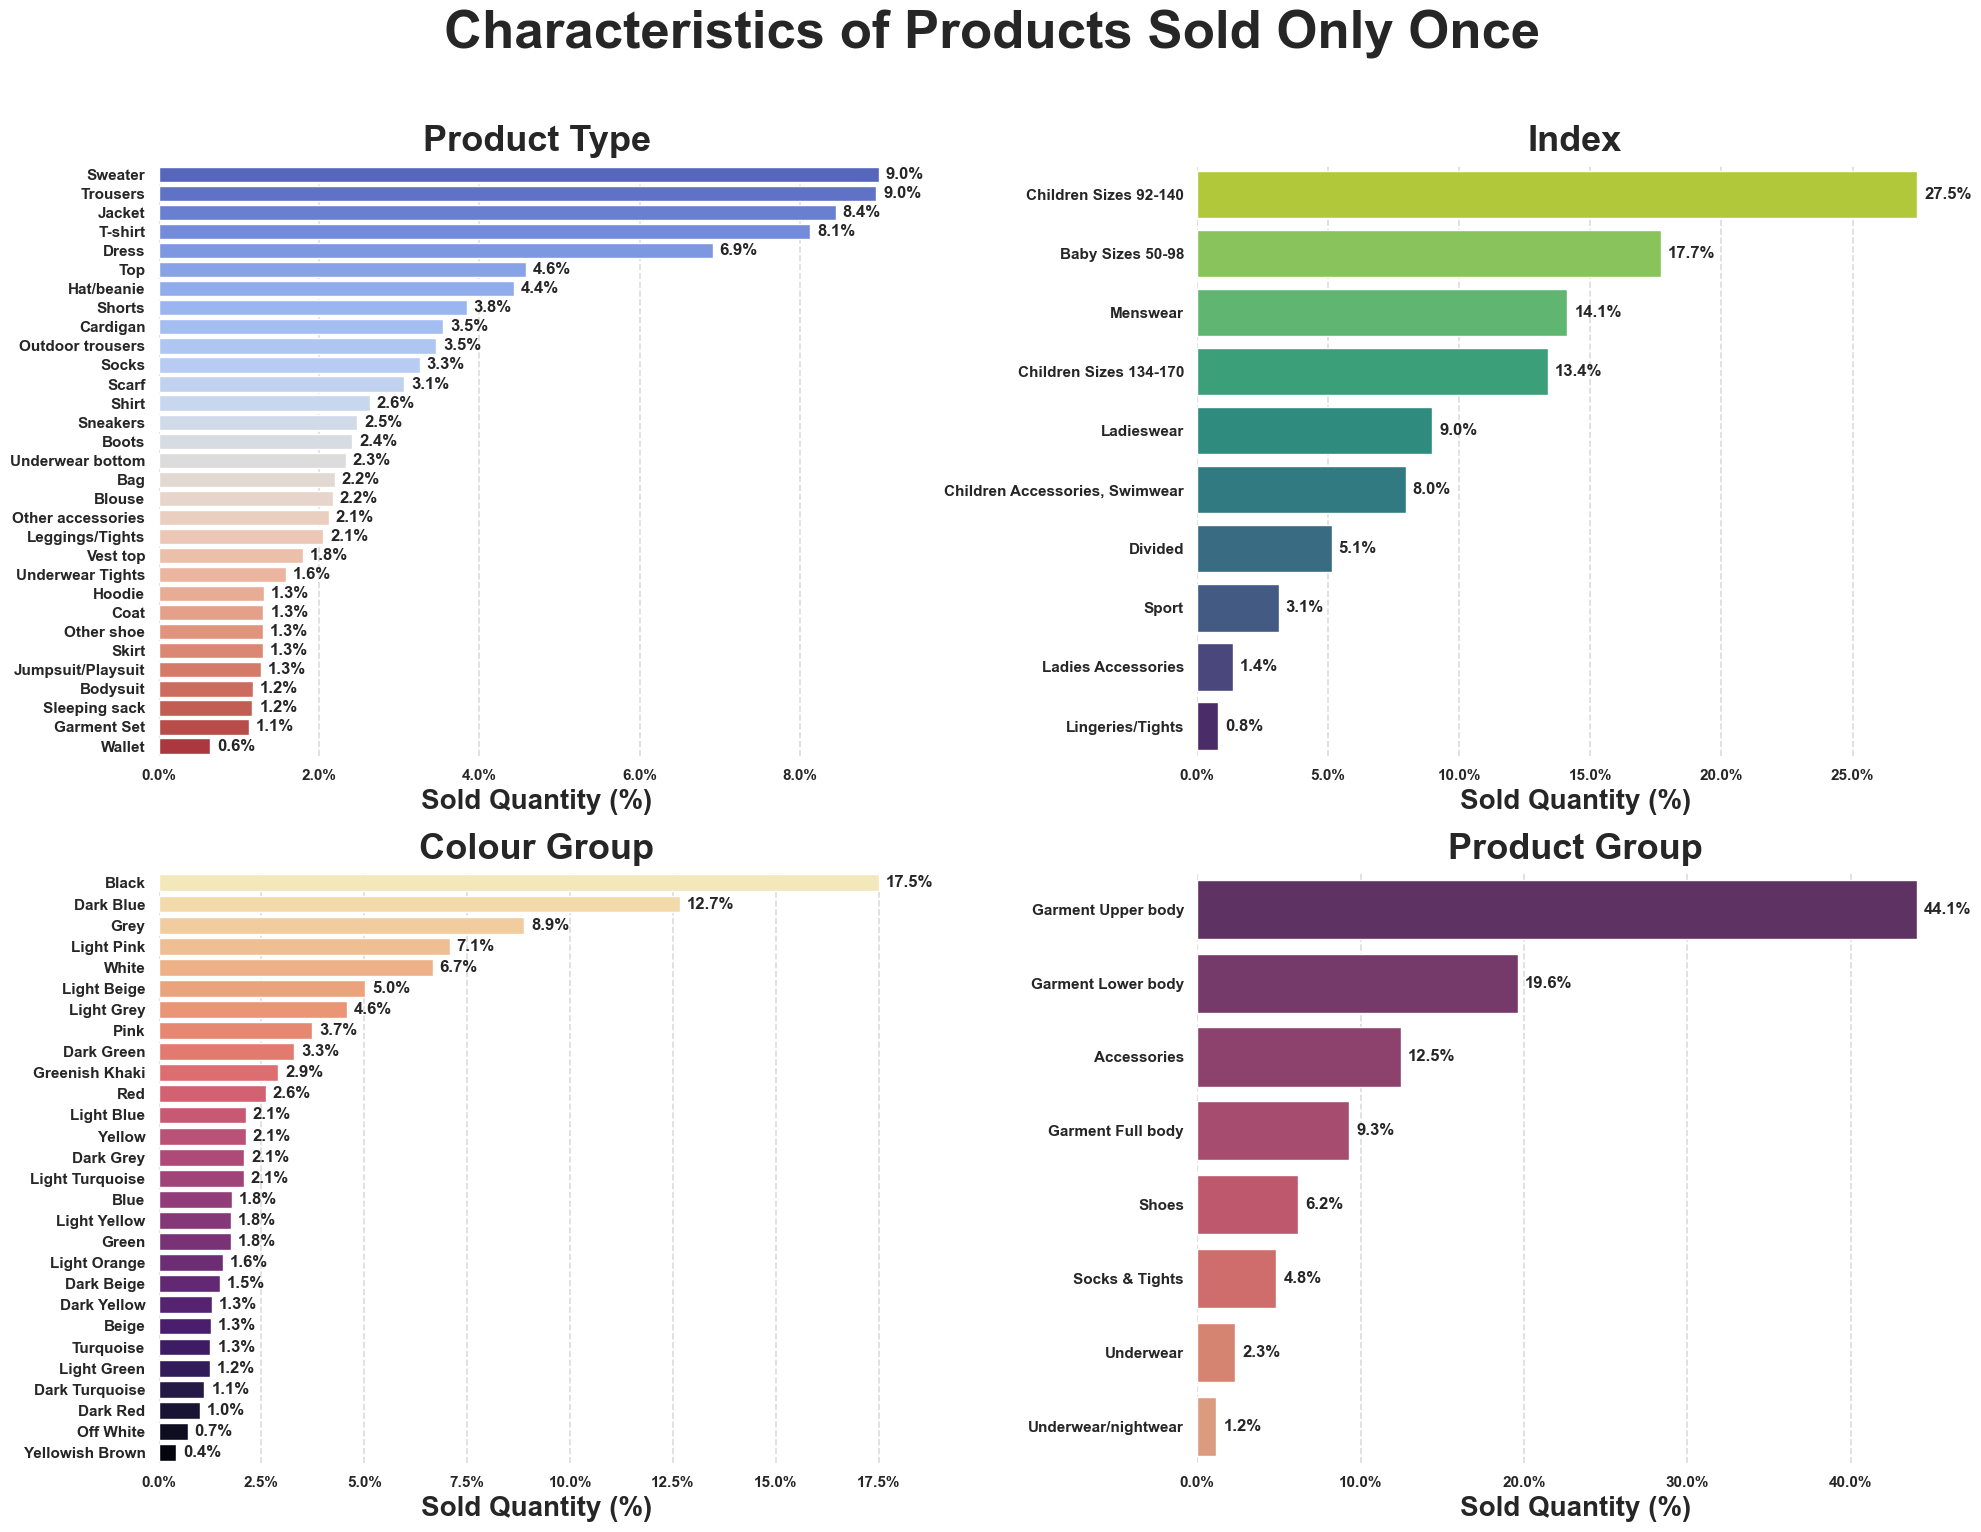

In [33]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
plt.suptitle("Characteristics of Products Sold Only Once", fontsize=38, fontweight="bold", y=1.02)

no = 100

# Helper function to prepare descending data
def prepare_data(df, column):
    return (
        df.iloc[:no]
        .groupby(column)["sold_qty"]
        .sum()
        .transform(lambda x: (x / x.sum() * 100))
        .rename('sold_qty(%)')
        .reset_index()
        .sort_values(by="sold_qty(%)", ascending=False)
    )

# Product Type
data = prepare_data(worst_details, "product_type_name")
palette = sns.color_palette("coolwarm", n_colors=len(data))
g = sns.barplot(
    y="product_type_name", x="sold_qty(%)", data=data,
    ax=ax[0,0], palette=palette, ci=False
)
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, weight="bold")
ax[0,0].set_xlabel("Sold Quantity (%)", fontsize=20, fontweight="bold")
ax[0,0].set_ylabel("")
ax[0,0].set_title("Product Type", fontsize=26, fontweight="bold")
ax[0,0].grid(axis="x", linestyle='--', linewidth=1.2, alpha=0.7)
ax[0,0].xaxis.set_major_formatter(mtick.PercentFormatter())

# Index
data = prepare_data(worst_details, "index_name")
palette = sns.color_palette("viridis_r", n_colors=len(data))
g = sns.barplot(
    y="index_name", x="sold_qty(%)", data=data,
    ax=ax[0,1], palette=palette, ci=False
)
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, weight="bold")
ax[0,1].set_xlabel("Sold Quantity (%)", fontsize=20, fontweight="bold")
ax[0,1].set_ylabel("")
ax[0,1].set_title("Index", fontsize=26, fontweight="bold")
ax[0,1].grid(axis="x", linestyle='--', linewidth=1.2, alpha=0.7)
ax[0,1].xaxis.set_major_formatter(mtick.PercentFormatter())

# Colour Group
data = prepare_data(worst_details, "colour_group_name")
palette = sns.color_palette("magma_r", n_colors=len(data))
g = sns.barplot(
    y="colour_group_name", x="sold_qty(%)", data=data,
    ax=ax[1,0], palette=palette, ci=False
)
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, weight="bold")
ax[1,0].set_xlabel("Sold Quantity (%)", fontsize=20, fontweight="bold")
ax[1,0].set_ylabel("")
ax[1,0].set_title("Colour Group", fontsize=26, fontweight="bold")
ax[1,0].grid(axis="x", linestyle='--', linewidth=1.2, alpha=0.7)
ax[1,0].xaxis.set_major_formatter(mtick.PercentFormatter())

# Product Group
data = prepare_data(worst_details, "product_group_name")
palette = sns.color_palette("flare_r", n_colors=len(data))
g = sns.barplot(
    y="product_group_name", x="sold_qty(%)", data=data,
    ax=ax[1,1], palette=palette, ci=False
)
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, weight="bold")
ax[1,1].set_xlabel("Sold Quantity (%)", fontsize=20, fontweight="bold")
ax[1,1].set_ylabel("")
ax[1,1].set_title("Product Group", fontsize=26, fontweight="bold")
ax[1,1].grid(axis="x", linestyle='--', linewidth=1.2, alpha=0.7)
ax[1,1].xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph3.png", dpi=150, bbox_inches="tight")

plt.show()


In [34]:
# Q3 - Which are the TOP 100 articles that generated most earnings for the company?

In [35]:
df_prices = df_t[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False)

In [36]:
df_prices.rename(columns={"price":"earning"}, inplace=True)
df_prices = df_prices.reset_index()

In [37]:
df_prices.head()

,article_id,earning
0,706016001,1631.732102
1,706016002,1136.321085
2,568601006,939.268593
3,448509014,781.478390
4,706016003,692.195915


In [38]:
print("Number of different sold articles:",len(df_prices["earning"]))
print("Total Earnings:",df_prices["earning"].sum())

Number of different sold articles: 104547
Total Earnings: 884645.974050846


In [39]:
for i in [10,50,100,200,300,400,1000]:
    print("The TOP {} of products that generate most earnings, account for the {:.2f} % of total earnings".format(i, df_prices["earning"].iloc[:i].sum() / df_prices["earning"].iloc[:].sum() * 100) ) 

The TOP 10 of products that generate most earnings, account for the 0.94 % of total earnings
The TOP 50 of products that generate most earnings, account for the 2.74 % of total earnings
The TOP 100 of products that generate most earnings, account for the 4.36 % of total earnings
The TOP 200 of products that generate most earnings, account for the 6.75 % of total earnings
The TOP 300 of products that generate most earnings, account for the 8.60 % of total earnings
The TOP 400 of products that generate most earnings, account for the 10.20 % of total earnings
The TOP 1000 of products that generate most earnings, account for the 17.50 % of total earnings


In [40]:
top_100_prices=df_prices.iloc[:100]

In [41]:
top_100_price_details = sqldf("""SELECT *
        FROM top_100_prices t
        INNER JOIN df_a a
        on t.article_id = a.article_id""")

In [42]:
top_100_price_details.head()

,article_id,earning,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,1631.732102,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,1136.321085,706016002,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,568601006,939.268593,568601006,Mariette Blazer,Blazer,Garment Upper body,Black,Ladieswear
3,448509014,781.478390,448509014,Perrie Slim Mom Denim TRS,Trousers,Garment Lower body,Blue,Divided
4,706016003,692.195915,706016003,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Dark Blue,Divided


/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/444840689.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/444840689.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(


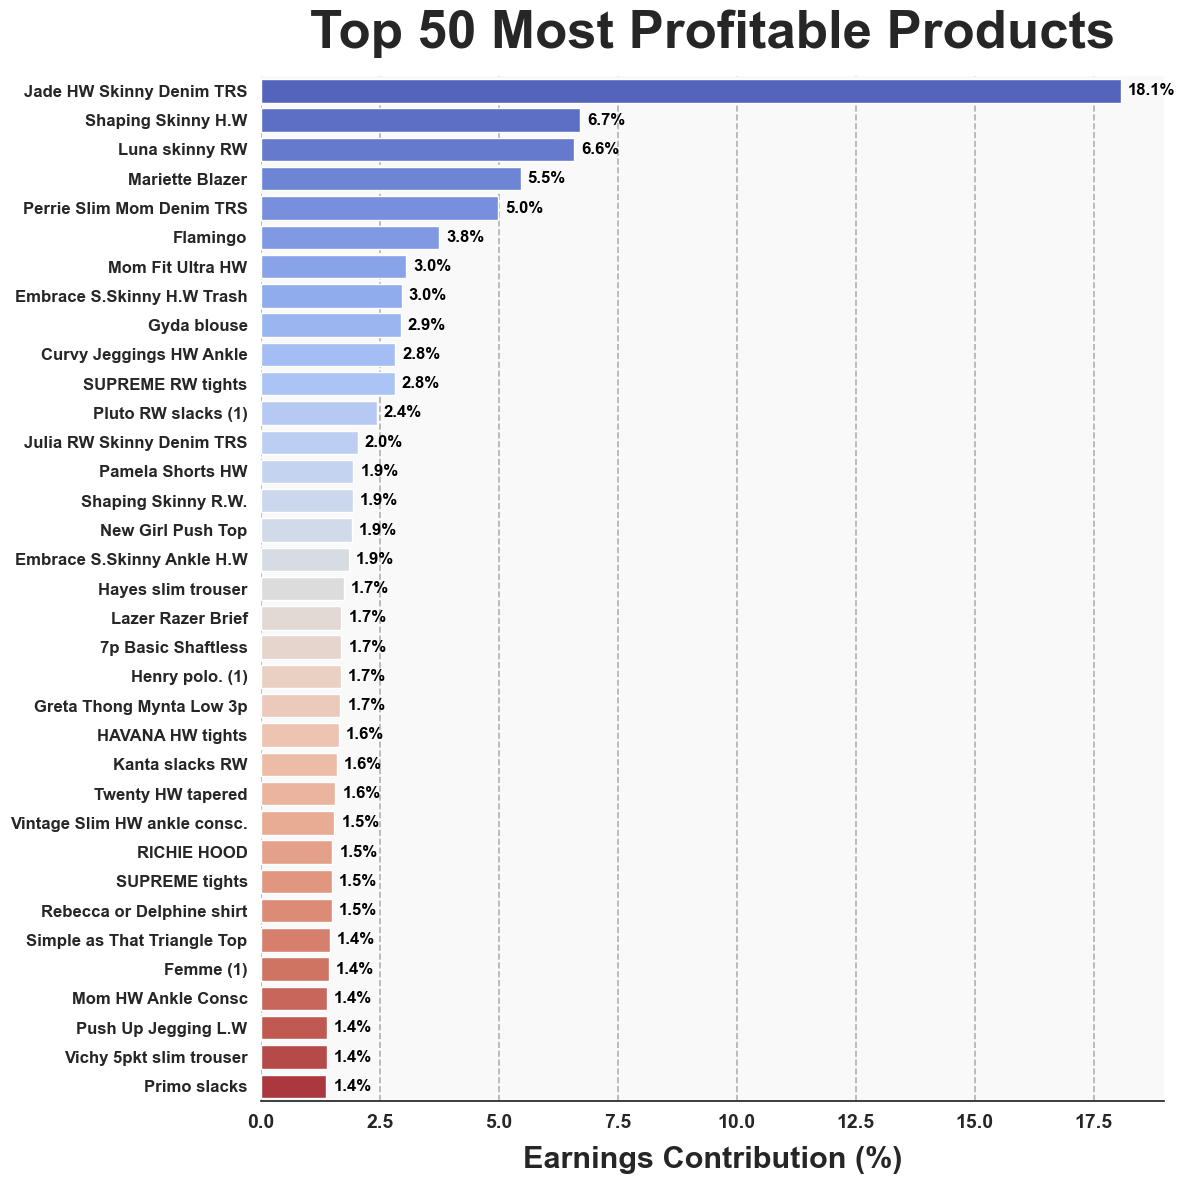

In [43]:
# Enhanced Visualization for TOP 50 Most Profitable Products

plt.figure(figsize=(12, 12))
plt.title("Top 50 Most Profitable Products", fontsize=38, fontweight="bold", pad=20)

# Number of top products
no = 50

# Prepare data (sorted in descending order)
profit_data = (
    top_100_price_details
    .iloc[:no]
    .groupby("prod_name")["earning"]
    .sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename('earning(%)')
    .reset_index()
    .sort_values(by="earning(%)", ascending=False)
)

# Beautiful color palette (vibrant + clear contrast)
palette = sns.color_palette("coolwarm", n_colors=len(profit_data))

# Plot
g = sns.barplot(
    y="prod_name", 
    x="earning(%)", 
    data=profit_data, 
    palette=palette, 
    ci=False
)

# Bar labels for clarity
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f%%', fontsize=12, color='black', fontweight='bold')

# Axis and label styling
plt.xlabel("Earnings Contribution (%)", fontsize=22, fontweight="bold", labelpad=10)
plt.ylabel("", fontsize=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis="x", color='gray', linestyle='--', linewidth=1.2, alpha=0.6)

# Remove unnecessary borders and improve readability
sns.despine(left=True, bottom=False)

# Add a subtle background for better visual separation
plt.gca().set_facecolor('#f9f9f9')

# Tight layout for better spacing
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph4.png", dpi=150, bbox_inches="tight")

plt.show()


/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2867583198.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2867583198.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2867583198.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2867583198.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
/var/folders/ph/rv6sjd

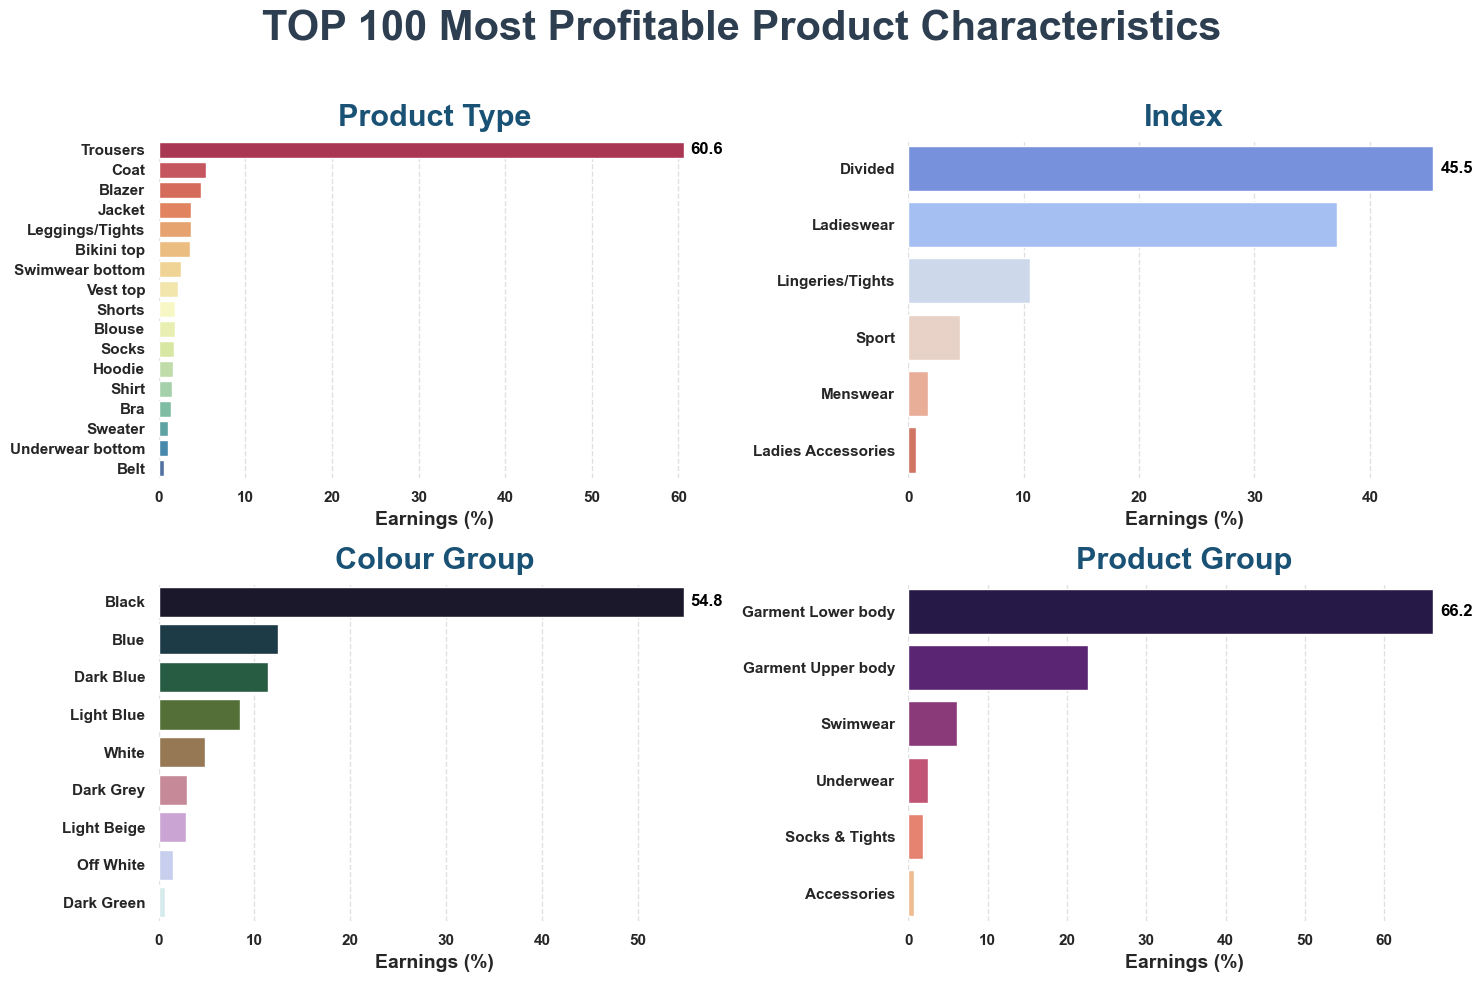

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot setup
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle("TOP 100 Most Profitable Product Characteristics", fontweight="bold", fontsize=30, color="#2C3E50")

no = 100

# 1️⃣ Product Type
g = sns.barplot(
    y="product_type_name",
    x="earning(%)",
    data=top_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename("earning(%)").reset_index()
    .sort_values(by="earning(%)", ascending=False),
    ax=ax[0, 0],
    palette="Spectral",
    ci=False
)
g.bar_label(g.containers[0], padding=5, fmt="%.1f", fontsize=12, color="black")
ax[0, 0].set_title("Product Type", fontsize=22, fontweight="bold", color="#1A5276")
ax[0, 0].set_xlabel("Earnings (%)", fontsize=14, fontweight="bold")
ax[0, 0].set_ylabel("")
ax[0, 0].grid(axis="x", linestyle="--", alpha=0.6)

# 2️⃣ Index
g = sns.barplot(
    y="index_name",
    x="earning(%)",
    data=top_100_price_details.iloc[:no].groupby("index_name")["earning"].sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename("earning(%)").reset_index()
    .sort_values(by="earning(%)", ascending=False),
    ax=ax[0, 1],
    palette="coolwarm",
    ci=False
)
g.bar_label(g.containers[0], padding=5, fmt="%.1f", fontsize=12, color="black")
ax[0, 1].set_title("Index", fontsize=22, fontweight="bold", color="#1A5276")
ax[0, 1].set_xlabel("Earnings (%)", fontsize=14, fontweight="bold")
ax[0, 1].set_ylabel("")
ax[0, 1].grid(axis="x", linestyle="--", alpha=0.6)

# 3️⃣ Colour Group
g = sns.barplot(
    y="colour_group_name",
    x="earning(%)",
    data=top_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename("earning(%)").reset_index()
    .sort_values(by="earning(%)", ascending=False),
    ax=ax[1, 0],
    palette="cubehelix",
    ci=False
)
g.bar_label(g.containers[0], padding=5, fmt="%.1f", fontsize=12, color="black")
ax[1, 0].set_title("Colour Group", fontsize=22, fontweight="bold", color="#1A5276")
ax[1, 0].set_xlabel("Earnings (%)", fontsize=14, fontweight="bold")
ax[1, 0].set_ylabel("")
ax[1, 0].grid(axis="x", linestyle="--", alpha=0.6)

# 4️⃣ Product Group
g = sns.barplot(
    y="product_group_name",
    x="earning(%)",
    data=top_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename("earning(%)").reset_index()
    .sort_values(by="earning(%)", ascending=False),
    ax=ax[1, 1],
    palette="magma",
    ci=False
)
g.bar_label(g.containers[0], padding=5, fmt="%.1f", fontsize=12, color="black")
ax[1, 1].set_title("Product Group", fontsize=22, fontweight="bold", color="#1A5276")
ax[1, 1].set_xlabel("Earnings (%)", fontsize=14, fontweight="bold")
ax[1, 1].set_ylabel("")
ax[1, 1].grid(axis="x", linestyle="--", alpha=0.6)

# Adjust layout for clarity
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f"{FIG_DIR}/graph5.png", dpi=150, bbox_inches="tight")

plt.show()


In [45]:
#Q4 - Which are articles that generated lower earnings for the company?

In [46]:
worst_100_prices=df_prices.iloc[-100:]

In [47]:
worst_100_price_details = sqldf("""SELECT *
        FROM worst_100_prices t
        INNER JOIN df_a a
        on t.article_id = a.article_id""")

In [48]:
worst_100_price_details.head()

,article_id,earning,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,555293002,0.002136,555293002,Elin thin hair elastic,Hair string,Accessories,Light Pink,Divided
1,502262002,0.002119,502262002,Kelly mittens,Gloves,Accessories,Light Grey,Baby Sizes 50-98
2,585716001,0.002034,585716001,Festival dress,Dress,Garment Full body,Light Orange,Children Sizes 134-170
3,807241091,0.001864,807241091,1p Fun Socks,Socks,Socks & Tights,Light Grey,Lingeries/Tights
4,551413003,0.001695,551413003,DANTE set,Garment Set,Garment Full body,Light Blue,Baby Sizes 50-98


/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2012022093.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g1 = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2012022093.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.barplot(
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2012022093.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(g1.get_xticklabels(), rotation=75, ha="right", fontsize=12)
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/2012022093.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  g2 = sns.barplot(
/var/fold

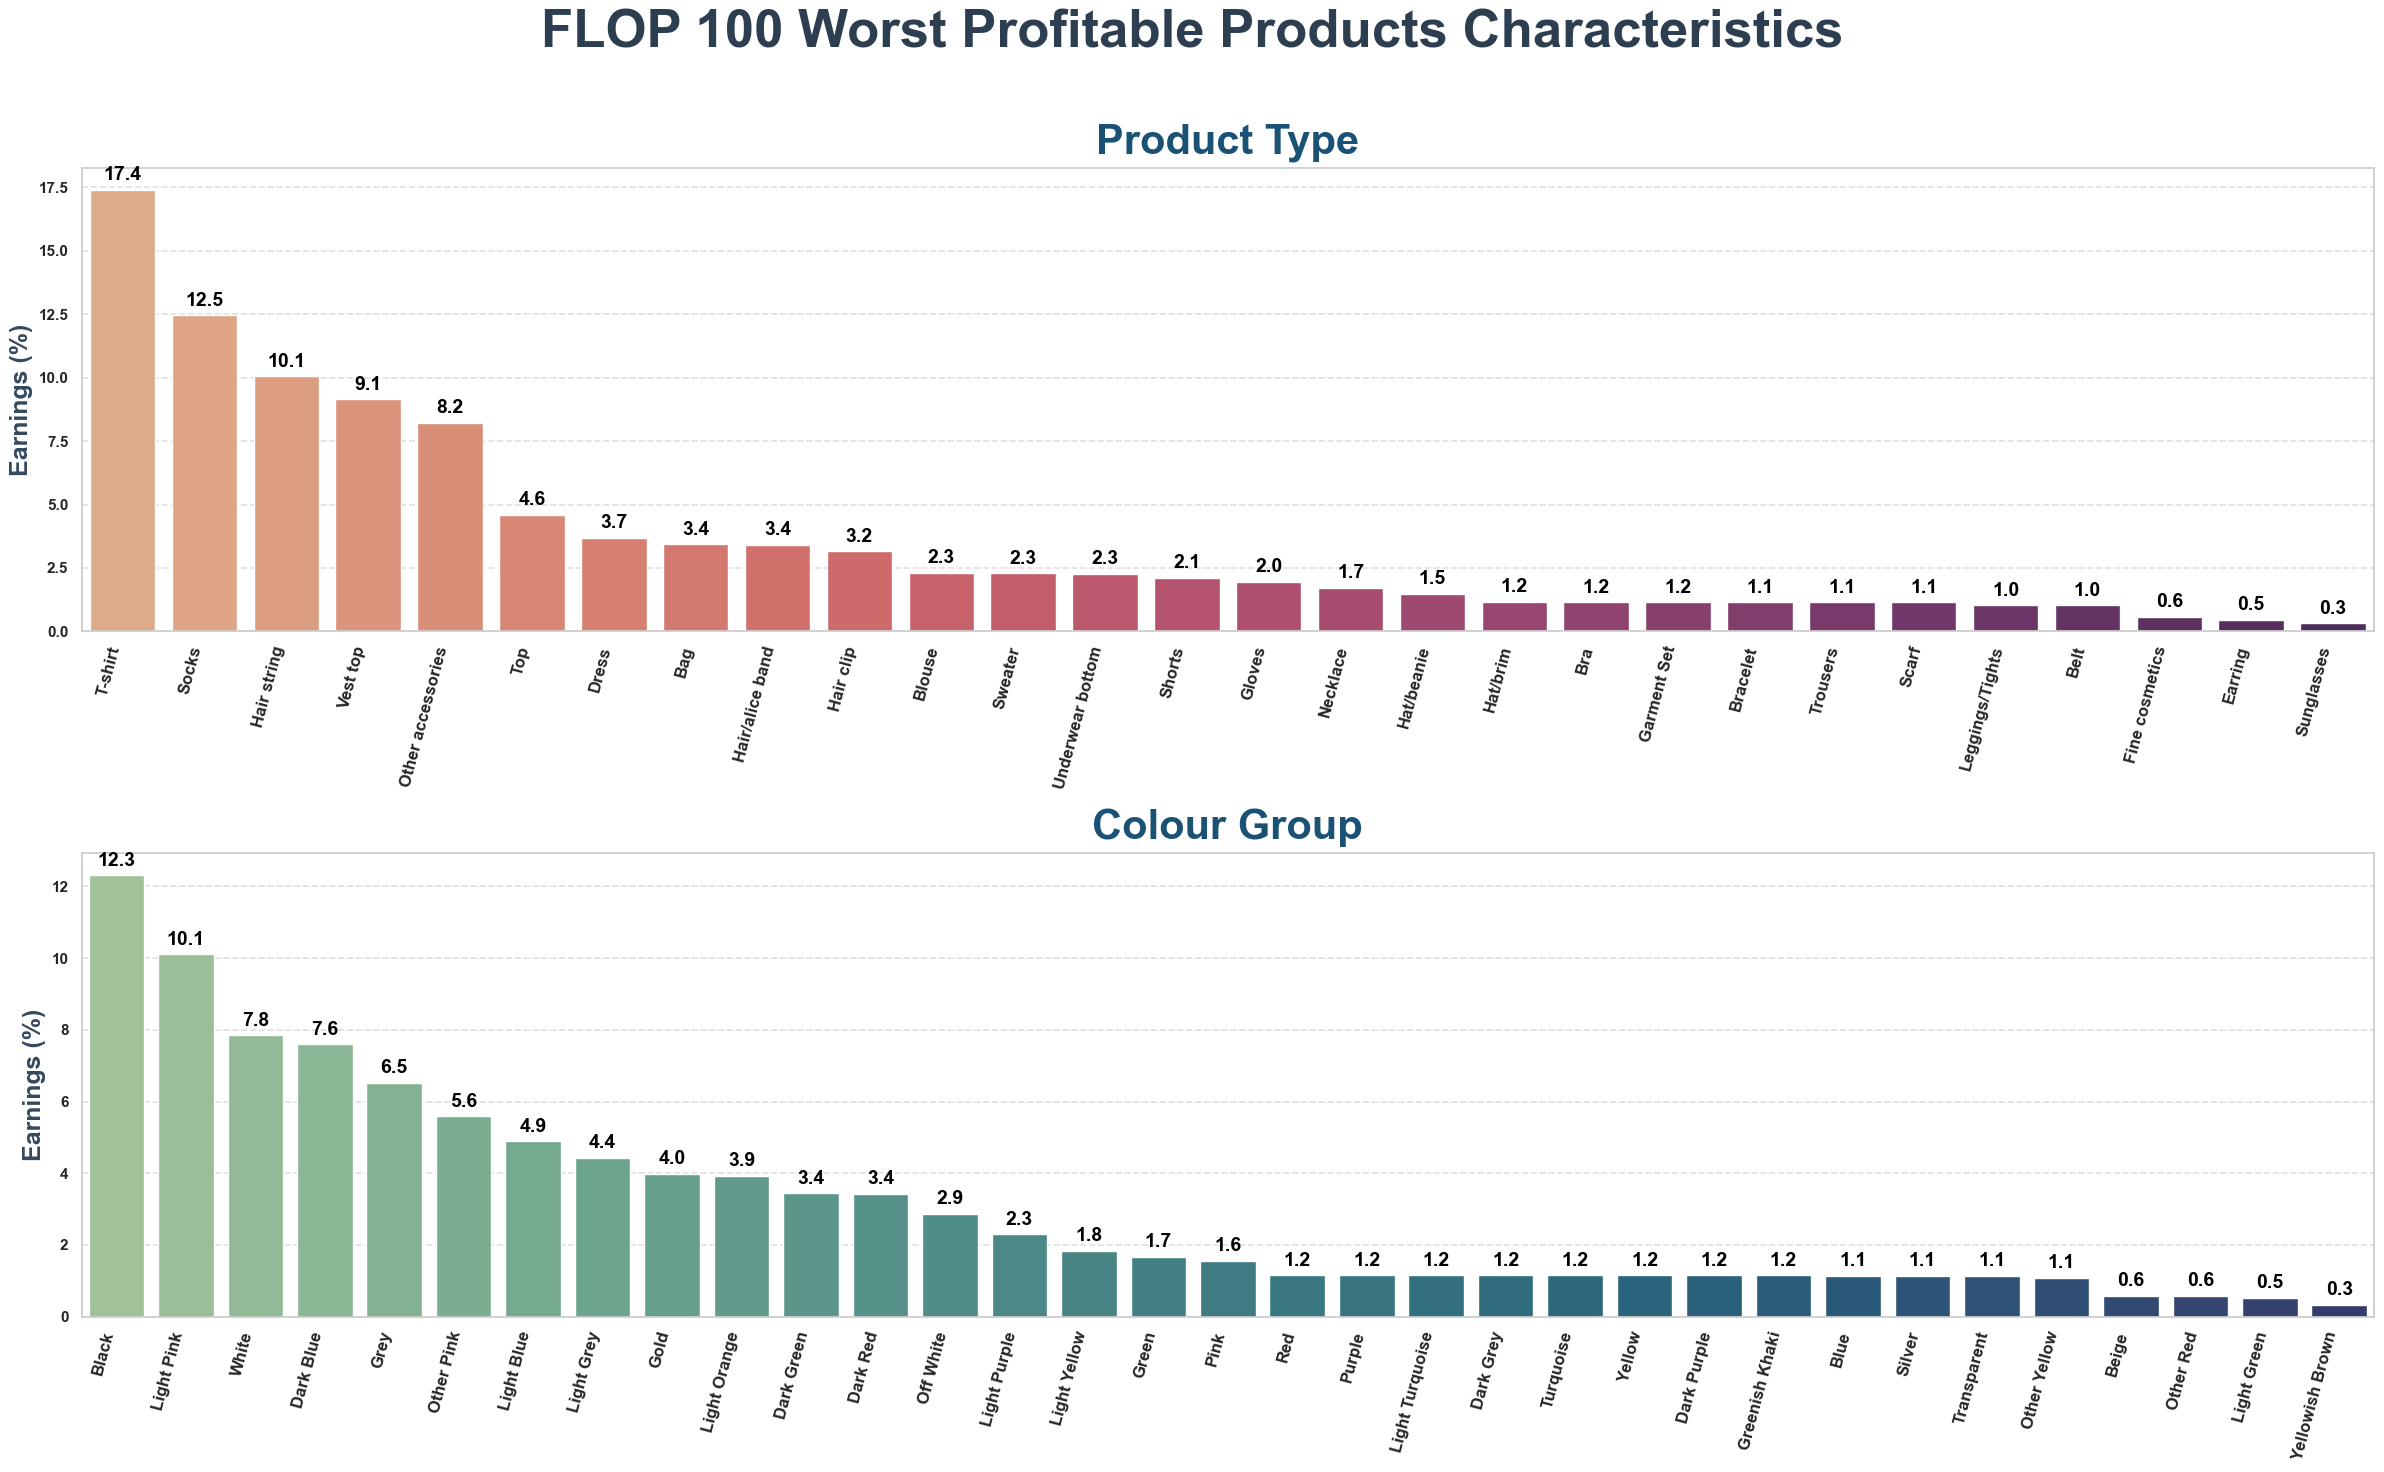

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set modern style
sns.set(style="whitegrid")

fig, ax = plt.subplots(2, 1, figsize=(24, 15))
plt.suptitle("FLOP 100 Worst Profitable Products Characteristics", fontsize=38, fontweight="bold", color="#2C3E50")

no = 100

#  Product Type
df1 = (
    worst_100_price_details.iloc[:no]
    .groupby("product_type_name")["earning"].sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename("earning(%)")
    .reset_index()
    .sort_values(by="earning(%)", ascending=False)
)

g1 = sns.barplot(
    x="product_type_name",
    y="earning(%)",
    data=df1,
    ax=ax[0],
    palette="flare",
    ci=False
)

# Add labels on bars
for container in g1.containers:
    g1.bar_label(container, fmt="%.1f", fontsize=14, color="black", padding=4)

ax[0].set_xlabel("")
ax[0].set_ylabel("Earnings (%)", fontsize=18, fontweight="bold", color="#34495E")
ax[0].set_xticklabels(g1.get_xticklabels(), rotation=75, ha="right", fontsize=12)
ax[0].set_title("Product Type", fontsize=30, fontweight="bold", color="#1A5276")
ax[0].grid(axis="y", linestyle="--", linewidth=1.2, alpha=0.6)

#2️ Colour Group
df2 = (
    worst_100_price_details.iloc[:no]
    .groupby("colour_group_name")["earning"].sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename("earning(%)")
    .reset_index()
    .sort_values(by="earning(%)", ascending=False)
)

g2 = sns.barplot(
    x="colour_group_name",
    y="earning(%)",
    data=df2,
    ax=ax[1],
    palette="crest",
    ci=False
)

# Add labels on bars
for container in g2.containers:
    g2.bar_label(container, fmt="%.1f", fontsize=14, color="black", padding=4)

ax[1].set_xlabel("")
ax[1].set_ylabel("Earnings (%)", fontsize=18, fontweight="bold", color="#34495E")
ax[1].set_xticklabels(g2.get_xticklabels(), rotation=75, ha="right", fontsize=12)
ax[1].set_title("Colour Group", fontsize=30, fontweight="bold", color="#1A5276")
ax[1].grid(axis="y", linestyle="--", linewidth=1.2, alpha=0.6)

# Final layout tweaks
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f"{FIG_DIR}/graph6.png", dpi=150, bbox_inches="tight")

plt.show()


In [50]:
df_t.head()

,customer_id,article_id,price
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932


In [51]:
df_cust_prices = df_t[["customer_id", "price"]].groupby("customer_id").sum()

In [52]:
df_cust_prices.head()

,price
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695


In [53]:
df_cust_qty = df_t[["customer_id", "article_id"]].groupby("customer_id").count()

In [54]:
df_cust_qty.head()

,article_id
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13


In [55]:
cust_qty_price = pd.merge(df_cust_prices, df_cust_qty, on='customer_id', how='inner')

In [56]:
cust_qty_price.head()

,price,article_id
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695,13


In [57]:
df_c.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [58]:
cust_details = pd.merge(cust_qty_price, df_c.drop("postal_code", axis=1), on='customer_id', how='inner')

In [59]:
cust_details.head()

,customer_id,price,article_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,21,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,86,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,18,NaN,NaN,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2,NaN,NaN,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,13,1.0,1.0,ACTIVE,Regularly,52.0


In [60]:
print(f"In total there are {len(cust_details)} different customers")

In total there are 1362281 different customers


In [61]:
cust_details.article_id.describe()

count    1.362281e+06
mean     2.333463e+01
std      3.924225e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.895000e+03
Name: article_id, dtype: float64

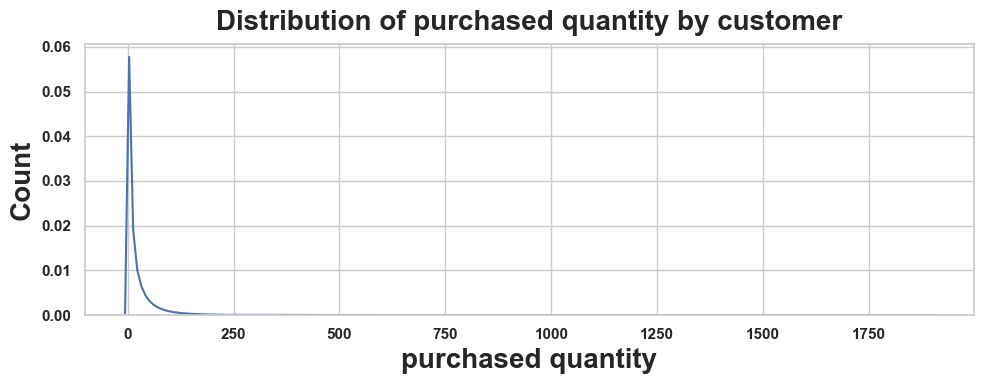

In [62]:
plt.figure(figsize=(10,4))
plt.title("Distribution of purchased quantity by customer", fontweight="bold", size=20)
sns.kdeplot(cust_details["article_id"])
plt.xlabel("purchased quantity",fontweight="bold", size=20)
plt.ylabel("Count",fontweight="bold", size=20)
plt.savefig(f"{FIG_DIR}/graph7.png", dpi=150, bbox_inches="tight")

plt.show()


In [ ]:
#Purchase Behaviors according to Age

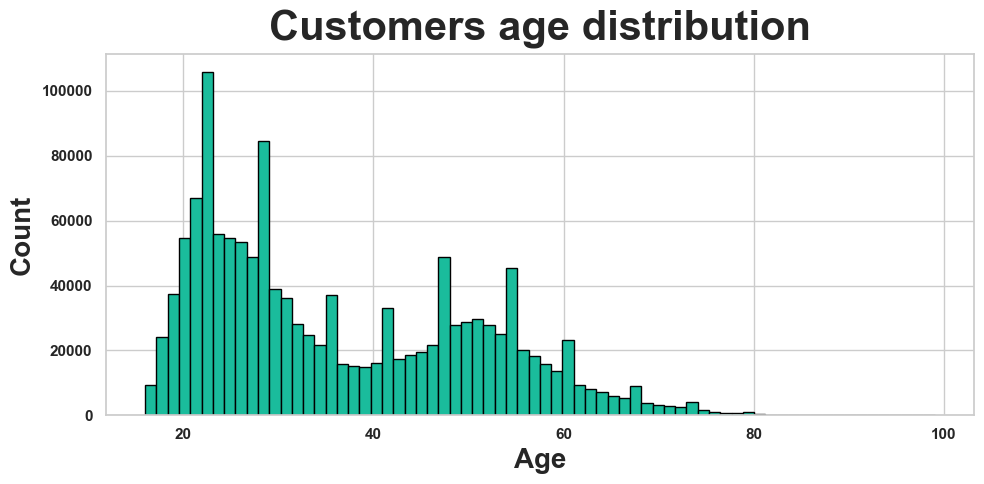

In [63]:
plt.figure(figsize=(10,5))
plt.title("Customers age distribution", fontweight="bold", size=30)
plt.hist(cust_details["age"], bins=70, edgecolor="black", color="#1ABC9C")
plt.xlabel("Age",fontweight="bold", size=20)
plt.ylabel("Count",fontweight="bold", size=20)
plt.savefig(f"{FIG_DIR}/graph8.png", dpi=150, bbox_inches="tight")

plt.show()

In [64]:
#Q5 - Which age group purchase more articles?

In [65]:
cust_details['age_groups'] = pd.cut(cust_details['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])

/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3514224712.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_details.groupby("age_groups")["article_id"].sum()
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3514224712.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(


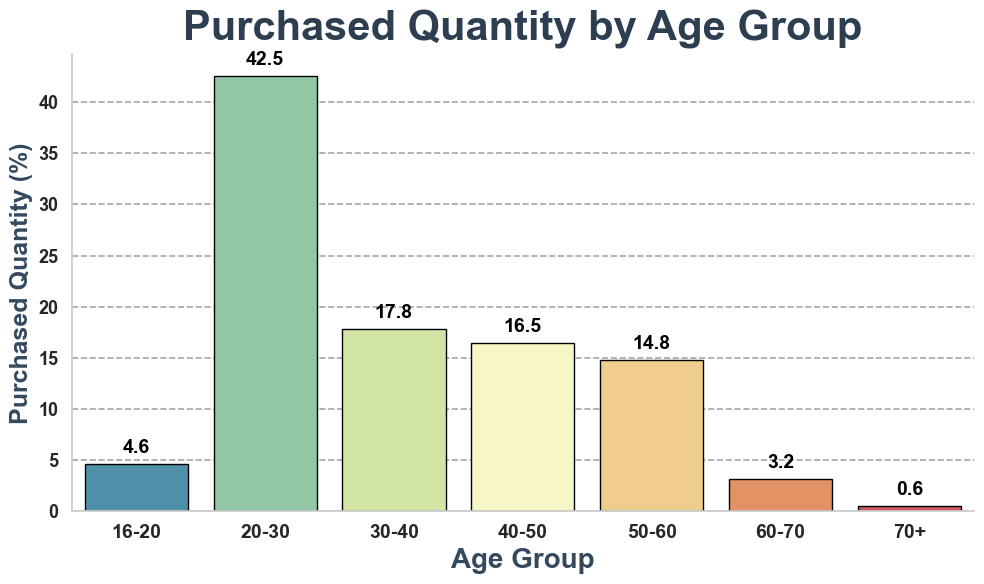

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a clean, modern style
sns.set(style="whitegrid")

# Prepare data in descending order
age_df = (
    cust_details.groupby("age_groups")["article_id"].sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename("Purchased Quantity(%)")
    .reset_index()
    .sort_values(by="Purchased Quantity(%)", ascending=False)
)

# Plot setup
plt.figure(figsize=(10,6))
plt.title("Purchased Quantity by Age Group", fontsize=30, fontweight="bold", color="#2C3E50")

# Create the barplot
g = sns.barplot(
    x="age_groups", 
    y="Purchased Quantity(%)", 
    data=age_df, 
    palette="Spectral_r",   # Vibrant descending gradient palette
    edgecolor="black"
)

# Customize labels and grid
plt.xlabel("Age Group", fontsize=20, fontweight="bold", color="#34495E")
plt.ylabel("Purchased Quantity (%)", fontsize=18, fontweight="bold", color="#34495E")
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=13)
plt.grid(axis="y", color='grey', linestyle='--', linewidth=1.2, alpha=0.7)

# Add labels on top of bars
for container in g.containers:
    g.bar_label(container, fmt="%.1f", fontsize=14, padding=5, color="black", fontweight="bold")

# Add subtle frame and spacing
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph9.png", dpi=150, bbox_inches="tight")

plt.show()


In [67]:
#Q6 - Which age group generates more earnings for the comp

/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/1139128158.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sns.barplot(x="age_groups", y="earning(%)", data=cust_details.groupby("age_groups")["price"].sum() \
/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/1139128158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="age_groups", y="earning(%)", data=cust_details.groupby("age_groups")["price"].sum() \


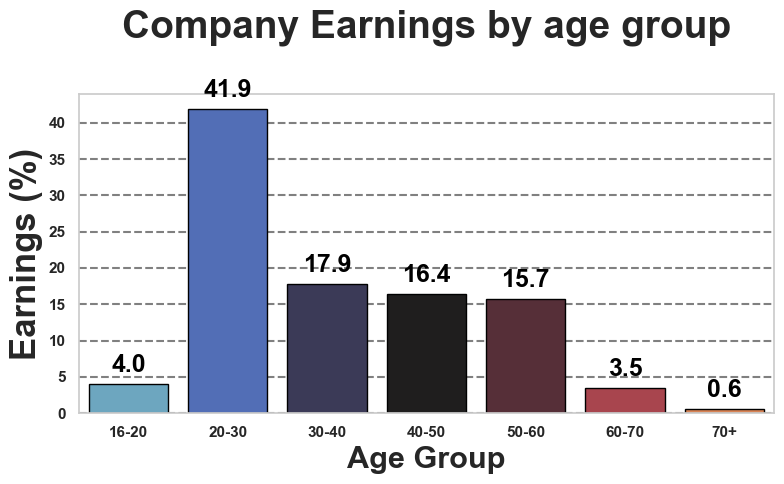

In [68]:
plt.figure(figsize=(8,5))
plt.title("Company Earnings by age group\n", fontweight="bold", size=28)
g = sns.barplot(x="age_groups", y="earning(%)", data=cust_details.groupby("age_groups")["price"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(), palette="icefire",edgecolor="black")
plt.xlabel("Age Group",fontweight="bold", size=22)
plt.ylabel("Earnings (%)",fontweight="bold", size=25)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.savefig(f"{FIG_DIR}/graph10.png", dpi=150, bbox_inches="tight")

plt.show()

In [69]:
#Q7 Which customer segments (age, club membership, engagement with fashion news) generate the most revenue and purchase frequency?

/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/4242289531.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(


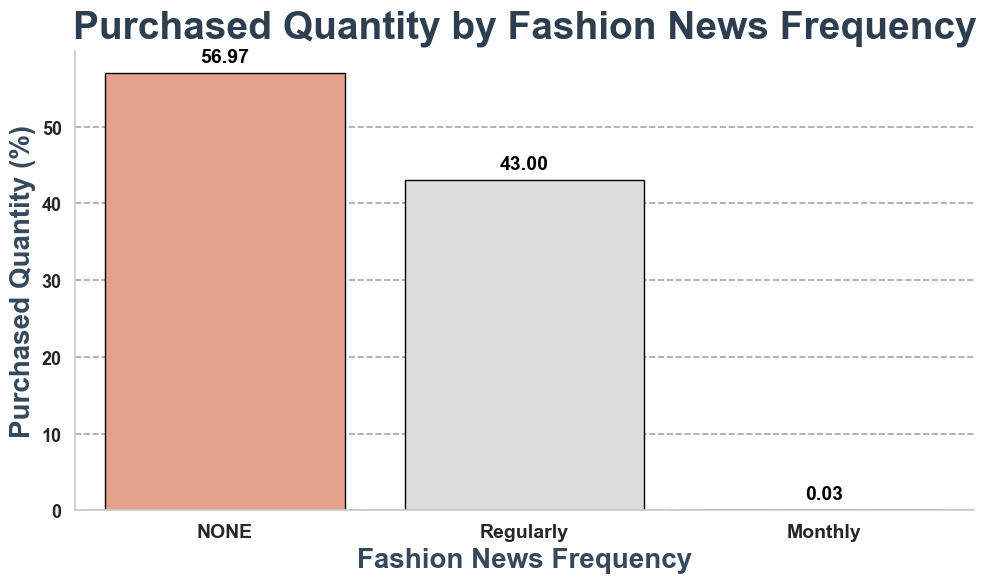

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean white style for clarity
sns.set(style="whitegrid")

# Prepare data in descending order for clarity
fashion_df = (
    cust_details.groupby("fashion_news_frequency")["article_id"].sum()
    .transform(lambda x: (x / x.sum() * 100))
    .rename("Purchased Quantity(%)")
    .reset_index()
    .sort_values(by="Purchased Quantity(%)", ascending=False)
)

# Create figure
plt.figure(figsize=(10,6))
plt.title("Purchased Quantity by Fashion News Frequency", fontsize=28, fontweight="bold", color="#2C3E50")

# Bar plot with an elegant gradient palette
g = sns.barplot(
    x="fashion_news_frequency", 
    y="Purchased Quantity(%)", 
    data=fashion_df,
    palette="coolwarm_r",   # Modern reversed cool-warm gradient
    edgecolor="black"
)

# Customize axes
plt.xlabel("Fashion News Frequency", fontsize=20, fontweight="bold", color="#34495E")
plt.ylabel("Purchased Quantity (%)", fontsize=20, fontweight="bold", color="#34495E")
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=13)
plt.grid(axis="y", color='grey', linestyle='--', linewidth=1.2, alpha=0.7)

# Add labels to bars
for container in g.containers:
    g.bar_label(container, fmt="%.2f", fontsize=14, padding=5, color="black", fontweight="bold")

# Refine the layout
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph11.png", dpi=150, bbox_inches="tight")

plt.show()


/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3772543985.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_details.groupby(x)[y].value_counts(normalize=True)


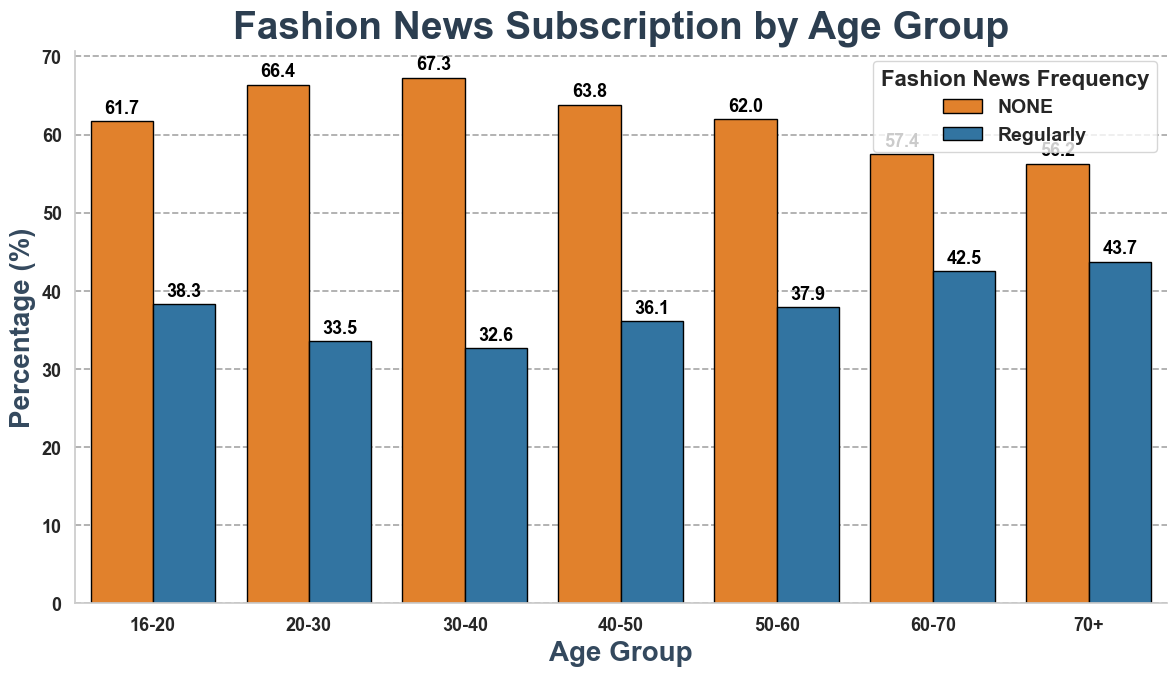

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group and calculate percentage
x, y = 'age_groups', 'fashion_news_frequency'
df_age_news = (
    cust_details.groupby(x)[y].value_counts(normalize=True)
    .mul(100)
    .rename('percent(%)')
    .reset_index()
)

# Filter for specific categories
df_age_news = df_age_news[df_age_news["fashion_news_frequency"].isin(["Regularly", "NONE"])]

# Apply modern visual style
sns.set(style="whitegrid", font_scale=1.2)

# Create figure
plt.figure(figsize=(12,7))
plt.title("Fashion News Subscription by Age Group", fontsize=28, fontweight="bold", color="#2C3E50")

# Use a bold, color-blind-friendly palette
palette = {"Regularly": "#1f77b4", "NONE": "#ff7f0e"}  # Blue and Orange

# Plot
g = sns.barplot(
    data=df_age_news.sort_values(by="percent(%)", ascending=False),
    x="age_groups",
    y="percent(%)",
    hue="fashion_news_frequency",
    palette=palette,
    edgecolor="black",
)

# Customize labels and grid
plt.xlabel("Age Group", fontsize=20, fontweight="bold", color="#34495E")
plt.ylabel("Percentage (%)", fontsize=20, fontweight="bold", color="#34495E")
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis="y", color='grey', linestyle='--', linewidth=1.2, alpha=0.7)
plt.legend(title="Fashion News Frequency", title_fontsize=16, fontsize=14, loc="upper right", frameon=True)

# Add bar labels
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=13, padding=3, color="black", fontweight="bold")

sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph12.png", dpi=150, bbox_inches="tight")

plt.show()


In [ ]:
#Q8 - Does the club member status influence the purchased quantity of articles?

In [72]:
cust_details["club_member_status"].value_counts(normalize=True)

club_member_status
ACTIVE        0.931395
PRE-CREATE    0.068261
LEFT CLUB     0.000344
Name: proportion, dtype: float64

In [73]:
# We can see that:

#More than 93% of the customers belong to the ACTIVE category
#6.8% of the customers belong to the PRE-CREATE cateory
#0.3% of the customers belong to the LEFT CLUB category

#This shows a very high imbalance among the classes: if we consider the sum of purchased products per each category, this will likely show that the most part of Purchased products belongs to the ACTIVE members.

In [74]:
cust_details.groupby("club_member_status")["article_id"].sum()

club_member_status
ACTIVE        31057401
LEFT CLUB         8539
PRE-CREATE      660219
Name: article_id, dtype: int64

In [75]:
print("The average quantity of purchased products by the customers is {:.0f} products ".format(cust_details["article_id"].mean()))

The average quantity of purchased products by the customers is 23 products 


/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/3670749611.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(


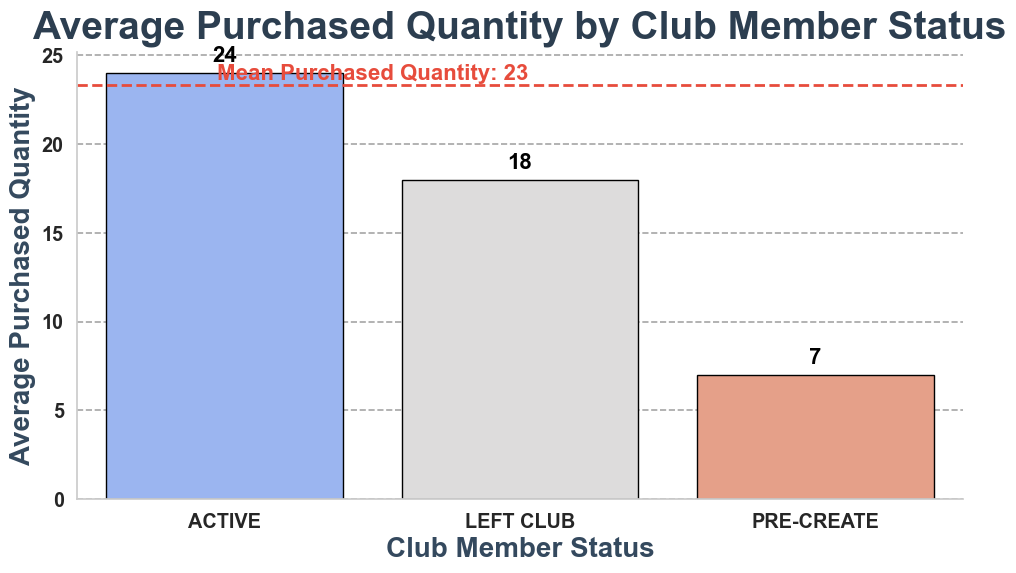

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set modern visual theme
sns.set(style="whitegrid", font_scale=1.3)

plt.figure(figsize=(10,6))
plt.title("Average Purchased Quantity by Club Member Status", fontsize=28, fontweight="bold", color="#2C3E50")

# Compute average purchased quantity per member status
avg_data = cust_details.groupby("club_member_status")["article_id"].mean().reset_index()
avg_data["article_id"] = avg_data["article_id"].astype(int)

# Use a bold, elegant palette (purple to pink gradient)
palette = sns.color_palette("coolwarm", n_colors=len(avg_data))

# Create the barplot
g = sns.barplot(
    x="club_member_status", 
    y="article_id", 
    data=avg_data,
    palette=palette,
    edgecolor="black"
)

# Add overall mean line
mean_value = cust_details["article_id"].mean()
plt.axhline(y=mean_value, color='#E74C3C', linestyle='--', linewidth=2)
plt.text(
    0.5, mean_value + 0.3, 
    f'Mean Purchased Quantity: {mean_value:.0f}', 
    fontsize=16, color="#E74C3C", fontweight="bold", 
    ha='center'
)

# Axis labels
plt.xlabel("Club Member Status", fontsize=20, fontweight="bold", color="#34495E")
plt.ylabel("Average Purchased Quantity", fontsize=20, fontweight="bold", color="#34495E")

# Add value labels on bars
for container in g.containers:
    g.bar_label(container, fmt='%.0f', fontsize=16, padding=5, color="black", fontweight="bold")

# Customize grid and style
plt.grid(axis="y", color='grey', linestyle='--', linewidth=1.2, alpha=0.7)
sns.despine()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph13.png", dpi=150, bbox_inches="tight")

plt.show()


/var/folders/ph/rv6sjdd51pq0pst1g6tx_s9w0000gs/T/ipykernel_27630/315890893.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(


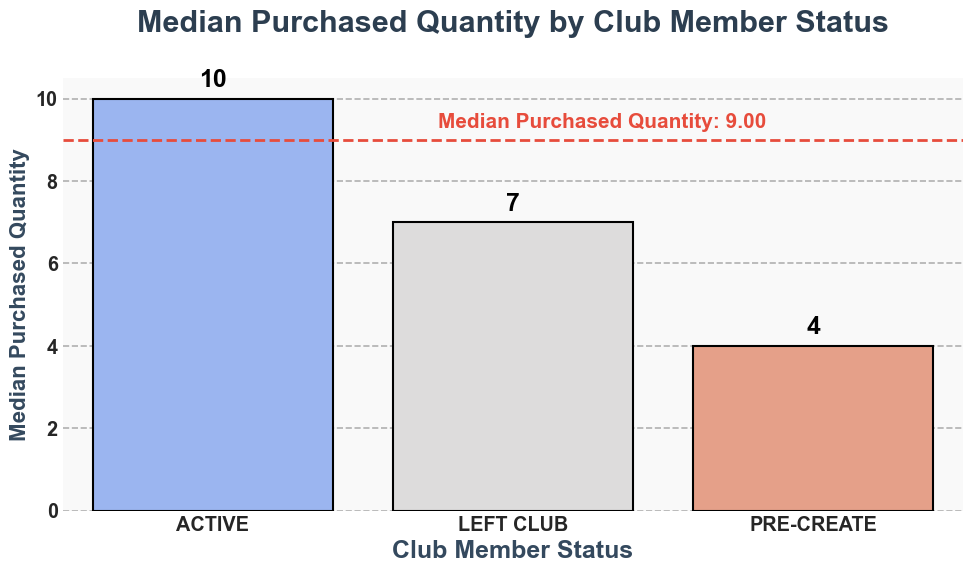

In [77]:
plt.figure(figsize=(10,6))
plt.style.use("seaborn-v0_8-darkgrid")

# Title
plt.title("Median Purchased Quantity by Club Member Status\n", fontweight="bold", size=22, color="#2c3e50")

# Compute median data
median_data = cust_details.groupby("club_member_status")["article_id"].median().reset_index()

# Barplot with new palette and edge styling
g = sns.barplot(
    x="club_member_status", 
    y="article_id", 
    data=median_data, 
    palette="coolwarm", 
    edgecolor="black", 
    linewidth=1.5
)

# Horizontal line for overall median
plt.axhline(
    y=cust_details["article_id"].median(), 
    color='#e74c3c', 
    linestyle='--', 
    linewidth=2
)

# Add median text annotation
plt.text(
    0.75, 
    cust_details["article_id"].median() + 0.3, 
    'Median Purchased Quantity: {:.2f}'.format(cust_details["article_id"].median()), 
    size=15, 
    color="#e74c3c",
    fontweight="bold"
)

# Axis labels
plt.xlabel("Club Member Status", fontweight="bold", size=18, color="#34495e")
plt.ylabel("Median Purchased Quantity", fontweight="bold", size=16, color="#34495e")

# Bar labels
for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.0f', fontsize=18, color="black", fontweight="bold")

# Grid customization
plt.grid(axis="y", color='gray', linestyle='--', linewidth=1.2, alpha=0.6)

# Background and layout tweaks
plt.gca().set_facecolor("#f9f9f9")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/graph14.png", dpi=150, bbox_inches="tight")

plt.show()
